In [1]:
import pandas
import numpy as np
import uproot
%matplotlib inline
import matplotlib.pyplot as plt

In [2]:
file_name = '../../tuples/cmssw_validation/DY_nv.hdf5'
df = pandas.read_hdf(file_name)

In [14]:
def ProcessDF(df):
    df['deepId_tau_vs_jet'] = pandas.Series(df['deepId_tau'] / (df['deepId_tau'] + df['deepId_jet']), index=df.index)
    df['deepId_tau_vs_mu'] = pandas.Series(df['deepId_tau'] / (df['deepId_tau'] + df['deepId_mu']), index=df.index)
    df['deepId_tau_vs_e'] = pandas.Series(df['deepId_tau'] / (df['deepId_tau'] + df['deepId_e']), index=df.index)
    df['deepId_tau_vs_all'] = pandas.Series(df['deepId_tau']
                                     / (df['deepId_tau'] + df['deepId_e'] + df['deepId_mu'] + df['deepId_jet']), index=df.index)

In [15]:
ProcessDF(df)

In [5]:
def ReadBrancesToDataFrame(file_name, tree_name):
    with uproot.open(file_name) as file:
        tree = file[tree_name]
        df = tree.arrays(outputtype=pandas.DataFrame)
        df.columns = [ c.decode('utf-8') for c in df.columns ]
    return df

In [7]:
cmssw_file_name = '../../tuples/cmssw_validation/DY_cmssw.root'
df_cmssw = ReadBrancesToDataFrame(cmssw_file_name, 'taus')

In [8]:
df.shape

(28862, 24)

In [9]:
df_cmssw.shape

(28862, 21)

max:  0.009469139562070183
within acc: 0.9908183771048438


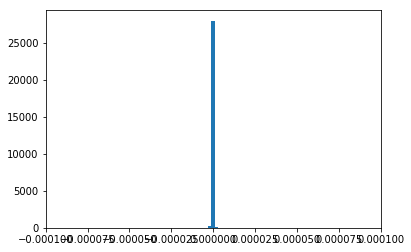

In [34]:
acc = 1e-4
bins = np.linspace(-acc, acc, num=100)
var = 'deepId_tau_vs_jet'
x = df_cmssw[var] - df[var]
print('max: ', np.abs(x).max())
print('within acc:', np.count_nonzero(np.abs(x) < acc)/x.shape[0])
plt.hist(x, bins=bins)
plt.xlim([bins[0], bins[-1]]);

In [13]:
df_cmssw.columns

Index(['run', 'lumi', 'evt', 'genEventWeight', 'tau_index', 'pt', 'eta', 'phi',
       'decayMode', 'gen_e', 'gen_mu', 'gen_tau', 'gen_jet', 'deepId_tau_vs_e',
       'deepId_tau_vs_mu', 'deepId_tau_vs_jet', 'deepId_tau_vs_all', 'refId_e',
       'refId_mu_loose', 'refId_mu_tight', 'refId_jet'],
      dtype='object')